# Capstone: Analisando a temperatura do Brasil

Nessa prática iremos juntar os conhecimentos que vimos durante toda a matéria. Vamos analisar os dados de temperatura do Brasil que vimos nas aulas de Python. Vamos utilizar uma [regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear) para estimar a taxa de variação da temperatura ao longo dos anos. Finalmente, vamos visualizar esses valores em um mapa do Brasil.

Faremos funções para cada etapa para podermos testar as partes do nosso código separadamente.

## Setup

Abaixo, vamos carregar todas as bibliotecas que precisamos:

* `numpy` para fazer contas com matrizes e vetores
* `maptlotlib.pyplot` para fazer gráficos
* `mpl_toolkits.basemap` para fazer mapas
* `scipy.stats` para a regressão linear
* `glob` para descobrir os nomes de todos os arquivos em uma pasta

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from scipy.stats import linregress
from glob import glob

<div class="alert text-center" style="font-size: 16pt">
Diferente das outras práticas, eu vou preecher o código inicial ao vivo durante a aula. 
<br><br>
Façam junto comigo para não se perderem.
</div>

# Funções para ler informações do arquivo

In [3]:
def le_lat_lon(nome_arquivo):
    arquivo = open(nome_arquivo)
    for linhas in range(0,5):
        linha = arquivo.readline()
    partes = linha.split()
    lat = float(partes[1])
    if partes[2] == 'S,':
        lat = -lat
    lon = float(partes[3])
    if partes[4] == 'W':
        lon = -lon
    return lat, lon

In [4]:
lat, lon = le_lat_lon('dados/0.80S-49.02W-TAVG-Trend.txt')
print(lat, lon)

-0.8 -49.02


In [5]:
def le_temp_abs(nome_arquivo):
    arquivo = open(nome_arquivo)
    for linhas in range(48):
        linha = arquivo.readline()
    partes = linha.split()
    temp_abs = float(partes[-3])
    return temp_abs

In [6]:
temp_abs = le_temp_abs('dados/0.80S-49.02W-TAVG-Trend.txt')
print(temp_abs)

26.74


In [7]:
def le_anos_anomalias(nome_arquivo):
    arquivo = np.loadtxt(nome_arquivo, comments ='%')
    ano = arquivo[:,0] 
    mes = arquivo[:,1]
    ano_decimal = ano + (mes-1)/12
    anomalia = arquivo[:,4]
    return ano_decimal, anomalia
    

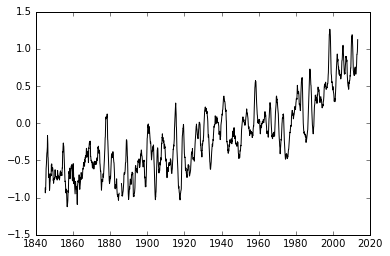

In [8]:
ano_decimal, anomalia = le_anos_anomalias('dados/0.80S-49.02W-TAVG-Trend.txt')
plt.figure()
plt.plot(ano_decimal, anomalia, '-k')

In [61]:
def cal_temp_real(nome_arquivo):
    #Função que calcula a temperatura real a partir das anomalias anuais e da temp absoluta.
    anos, anom = le_anos_anomalias(nome_arquivo)
    temp_abs = le_temp_abs(nome_arquivo)
    temperatura = anom + temp_abs
    return (anos, temperatura)

In [62]:
anos, temperatura = cal_temp_real('dados/0.80S-49.02W-TAVG-Trend.txt')
print(anos, temperatura)
#Testando função que retorna os valores de temperatura real.

[ 1845.          1845.08333333  1845.16666667 ...,  2013.5         2013.58333333
  2013.66666667] [    nan     nan  25.868 ...,     nan     nan     nan]


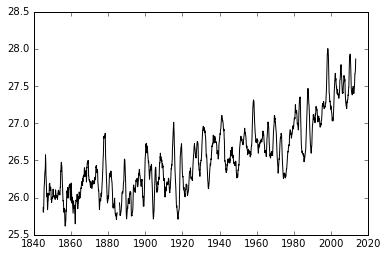

In [63]:
plt.figure()
plt.plot(anos, temp_real, '-k')

# Regressão linear

In [64]:
anos, anom = le_anos_anomalias('dados/0.80S-49.02W-TAVG-Trend.txt')
temp_abs = le_temp_abs('dados/0.80S-49.02W-TAVG-Trend.txt')
temp_real = temp_abs + anom

In [65]:
a, b, r_value, p_value, std_err = linregress(anos, temp_real)
print(a, '°C/ano')

nan °C/ano


C:\Users\Thais Erbas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Thais Erbas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in less
  cond1 = (scale > 0) & (x > self.a) & (x < self.b)
C:\Users\Thais Erbas\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:1749: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [73]:
ano_sem_nan = []
temperatura_sem_nan = []
for i in range(len(temp_real)):
    if not np.isnan(temp_real[i]):
        temperatura_sem_nan.append(temp_real[i])
        ano_sem_nan.append(anos[i])
        

In [74]:
a, b, r_value, p_value, std_err = linregress(ano_sem_nan, temperatura_sem_nan)
print(a, '°C/ano')

0.00832160974446 °C/ano


# Juntando tudo para fazer o mapa.

In [76]:
arquivos = glob('dados/*.txt')
lat_cidade = []
lon_cidade = []
taxa_de_var_temp = []
for arquivo in arquivos:
    lat, lon = le_lat_lon(arquivo)
    le_temp_abs(arquivo)
    anos, anom = le_anos_anomalias(arquivo)
    anos, temperatura = cal_temp_real(arquivo)
    not_nan = ~np.isnan(temperatura)
    temperaturas_sem_nan = temperatura[not_nan]
    a, b, r_value, p_value, std_err = linregress(ano_sem_nan, temperatura_sem_nan)
    lat_cidade.append(lat)
    lon_cidade.append(lon)
    taxa_de_var_temp.append(a)

In [79]:
print(lat_cidade)
print(lon_cidade)
print(taxa_de_var_temp)

[-0.8, -10.45, -13.66, -15.27, -2.41, -20.09, -20.09, -23.31, -23.31, -24.92, -29.74, -4.02]
[-49.02, -48.27, -38.81, -47.5, -60.27, -44.36, -54.6, -42.82, -46.31, -49.66, -51.69, -40.98]
[0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319, 0.0083216097444633319]


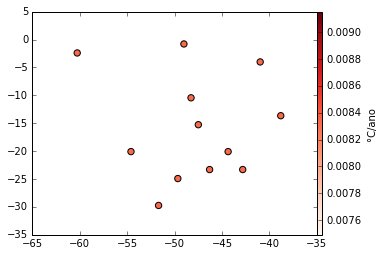

In [81]:
plt.figure()
plt.scatter(lon_cidade, lat_cidade, s=40, c=taxa_de_var_temp, cmap="Reds")
cb = plt.colorbar(pad=0, aspect=40)
cb.set_label("°C/ano")

In [82]:
bm = Basemap(projection='merc',
             llcrnrlat=-35, llcrnrlon=-65,
             urcrnrlat=5, urcrnrlon=-35,
             resolution='i')

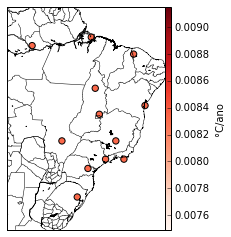

In [84]:
plt.figure()
bm.scatter(lon_cidade, lat_cidade, s=40, c=taxa_de_var_temp, cmap="Reds",
          latlon=True)
cb = plt.colorbar(pad=0, aspect=40)
cb.set_label('°C/ano')
bm.drawcoastlines(linewidth=0.5)
bm.drawcountries()
bm.drawstates(linewidth=0.5)

**Course website**: https://github.com/mat-esp/about

**Note**: This notebook is part of the course "Matemática Especial I" of the [Universidade do Estado do Rio de Janeiro](http://www.uerj.br/). All content can be freely used and adapted under the terms of the 
[Creative Commons Attribution 4.0 International License](http://creativecommons.org/licenses/by/4.0/).

![Creative Commons License](https://i.creativecommons.org/l/by/4.0/88x31.png)